Kavish Nag

240701260885

AIML B1

#Bivariate Analysis


- Bi means two, so Bivariate analysis meaning two variable analysis.
- Column can be of two types - 1. Continous and 2. Categorical
- So, Bivariate Analysis can be of Three types
    1. Continuos vs Continuous - Correlation Coefficient and VIF ( Variance inflation Factor)
    2. Categorical vs Categorical - Chi Square Test
    3. Categorical vs Continous - T Test (N<30) , Z Test(N>30) and ANOVA

In [ ]:
#Libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter('ignore')

In [ ]:
#Iris Dataset for classification
iris = datasets.load_iris()
#Convert to dataframe
iris_pd = pd.DataFrame(iris.data)
#Feature name
iris_pd.columns=iris.feature_names
#Target name
iris_pd['Class']=iris.target
#iris_pd is the final dataset

#California Dataset for regression
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
california_pd = pd.DataFrame(housing.data)
california_pd.columns = housing.feature_names
california_pd['MedHouseVal'] = housing.target

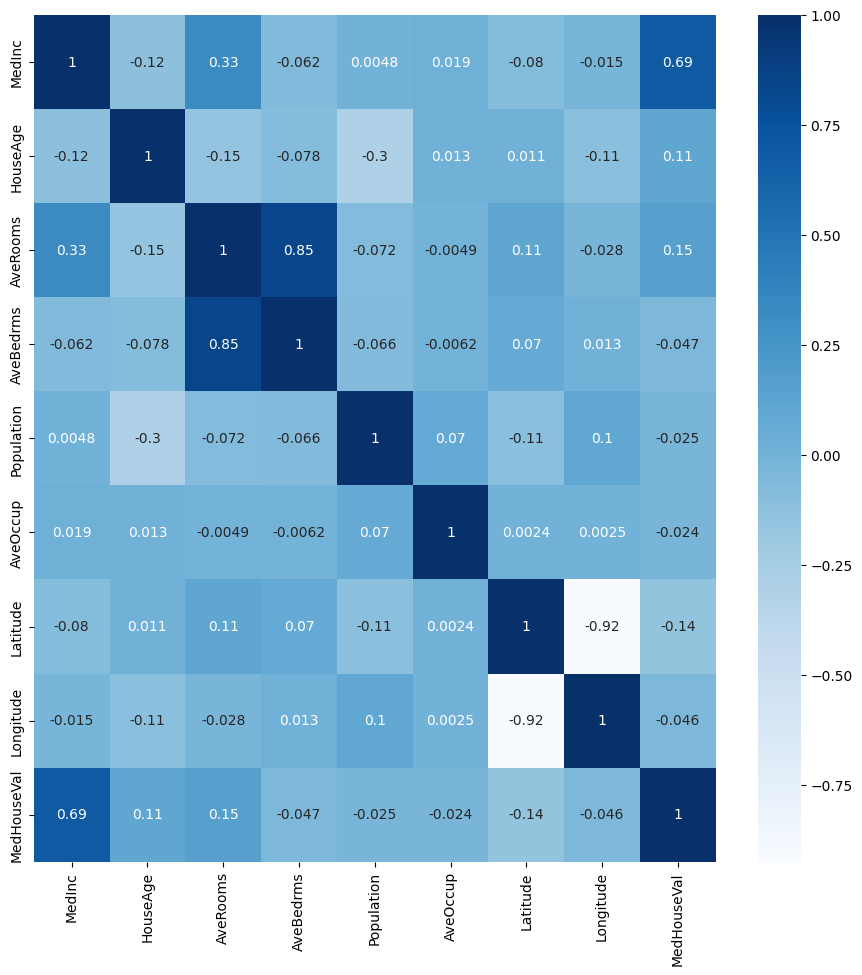

In [ ]:
import matplotlib.pyplot as plt
#Create a heatmap to visualize the correlation matrix of the california_pd DataFrame
fig,ax = plt.subplots(figsize=(11,11)) #Sample figsize in inches, change the number accordingly
sns.heatmap(california_pd.corr(method='pearson'),annot=True,cmap='Blues',ax=ax)
plt.show()

#MEDV and LSTAT is having -0.85 , we might need to remove one variable

#VIF
For numerical value


In [ ]:
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Define a function to calculate VIF for a given DataFrame
def calc_vif(x):

  #Calculate VIF
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

#Remove dependent column ('MedHouseVal') first and then apply VIF
x = california_pd.iloc[:,:-1]
calc_vif(x)

variables         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654

#2. Categorical vs Categorical- Chi Square Test

In [ ]:
#Display descriptive statistics of the iris_pd DataFrame
iris_pd.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       Class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [ ]:
#Print the data types of the iris_pd DataFrame columns
print("Datatypes of iris dataset")
iris_pd.dtypes

Datatypes of iris dataset


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object

In [ ]:
#Display descriptive statistics for the 'petal width (cm)' column
iris_pd["petal width (cm)"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

In [ ]:
#So median is 1.3
#Define labels for the bins
bin_label=['LOW','HIGH']
#Create a new categorical column 'Bin_Petal_Width' by quantiling 'petal width (cm)' into two bins
iris_pd['Bin_Petal_Width']=pd.qcut(iris_pd['petal width (cm)'],q=2,labels=bin_label)

#Display the first few rows of the modified DataFrame
iris_pd.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Class Bin_Petal_Width  
0      0             LOW  
1      0             LOW  
2      0             LOW  
3      0             LOW  
4      0             LOW

In [ ]:
#Frequency Count
#Count the occurrences of each category in the column
iris_pd['Bin_Petal_Width'].value_counts()

Bin_Petal_Width
LOW     78
HIGH    72
Name: count, dtype: int64

In [ ]:
#Convert Target column to categorical
iris_pd['Class']= iris_pd['Class'].astype('category')
#so datatype is
#Print the final data types of the iris_pd DataFrame
print("Final Datatypes")
iris_pd.dtypes

Final Datatypes


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Class                category
Bin_Petal_Width      category
dtype: object

In [ ]:
#Now we can check interaction effect between class and bin_petal_width through chi square test
#First create contigency table
#Create a contingency table to show the frequency distribution between 'Bin_Petal_Width' and 'Class'
contingency_table = pd.crosstab(iris_pd['Bin_Petal_Width'],iris_pd['Class'])
print("Contingency Table")
print(contingency_table)

Contingency Table
Class             0   1   2
Bin_Petal_Width            
LOW              50  28   0
HIGH              0  22  50


chi^2_stat: The computed Chi-square statistic

p_val: The p-value tht tells us the probablity of observing the given distribution if the null hupothesis is true.

dof : degree of freedom



In [ ]:
#Alternate hypothesis - petal width (bins) has some affect on class

#Chi square test
from scipy import stats
#Perform the Chi-square test for independence on the contingency table
chi2_stat,p_val,dof,ex=stats.chi2_contingency(contingingency_table)
#chi- square test values
#Print the Chi-square test results
print("Chi2 value",chi2_stat)
print("Degree of Freedom",dof)
print("P Value",p_val)
print("Expected Freq")
print(ex)

Chi2 value 100.64102564102565
Degree of Freedom 2
P Value 1.3998417931687032e-22
Expected Freq
[[26. 26. 26.]
 [24. 24. 24.]]


#Inferences:
- p-value is 1.339^-22 which is quite

In [ ]:
#Display the first few rows of the iris_pd DataFrame
iris_pd.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Class Bin_Petal_Width  
0     0             LOW  
1     0             LOW  
2     0             LOW  
3     0             LOW  
4     0             LOW

#Null hypothesis
- Sepal length has no affect on class.
#Alternate hypothesis
- Sepal length has some affect on class.

<Axes: xlabel='Class', ylabel='sepal length (cm)'>

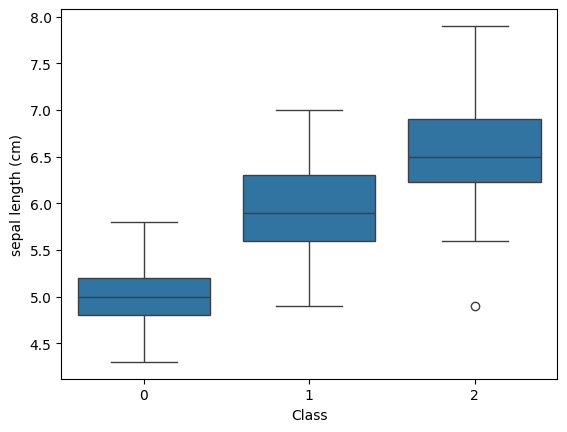

In [ ]:
#Lets plot the boxplot
#Create a boxplot to visualize the distribution of 'sepal length (cm)' across different 'Class' categories
sns.boxplot(x='Class', y='sepal length (cm)',data= iris_pd)

In [ ]:
#Use Z test
print("Number of samples in the set:", len(iris_pd))
print("Therefore use Z test")

ztest, pval = stests.ztest(iris_pd['Class'],iris_pd['sepal length (cm)'],alternative = 'two-sided')
print("Z test value is",ztest)
print("P value is", pval)

Number of samples in the set: 150
Therefore use Z test
Z test value is -50.92447470978208
P value is 0.0


#Inferences
P vale is less than 0.05 so reject NULL HYPOTHESIS

In other word, Sepal length can be good predictor for class.

- T test is applied on dataset below 30 values.

#ANOVA TEST
- A categorical and one numerical data.
- It's used to determine if there are any statistically significant differences between the means of two or more groups.

In [ ]:
#Create a new categorical column 'Bin_Sepal_Width' based on the median of 'sepal width (cm)'
iris_pd['Bin_Sepal_Width']= pd.qcut(iris_pd['sepal width (cm)'],q=[0,0.5,1],labels=bin_label)

#Remove the space and other symbols in column name to use in a model
iris_pd.columns = iris_pd.columns.str.replace(' ','')
iris_pd.columns = iris_pd.columns.str.replace('(cm)','')
iris_pd.columns = iris_pd.columns.str.replace('[^a-zA-Z]','')

In [ ]:
#Convert the 'Class' column to integer type
iris_pd['Class']=iris_pd['Class'].astype('int')

#Building Regression Model using Ordinary Least Squares (OLS)
#The model examines the interaction effect between 'Bin_Petal_Width' and 'Bin_Sepal_Width' on 'Class'
model = ols('Class ~ C(Bin_Petal_Width) *C(Bin_Sepal_Width)',iris_pd).fit()
#Display the summary of the regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.55e-48
Time:                        09:36:19   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(Bin_Petal_Width)[T.HIGH]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(Bin_Sepal_Width)[T.HIGH]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(Bin_Petal_Width)[T.HIGH]:C(Bin_Sepal_Width)[T.HIGH]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Perform ANOVA test on the OLS model
#type=2 specifies the type of ANOVA test to be performed (Type II sum of squares)
sm.stats.anova_lm(model,type = 2)

df     sum_sq    mean_sq  \
C(Bin_Petal_Width)                       1.0  66.773504  66.773504   
C(Bin_Sepal_Width)                       1.0   6.675232   6.675232   
C(Bin_Petal_Width):C(Bin_Sepal_Width)    1.0   5.059254   5.059254   
Residual                               146.0  21.492009   0.147206   

                                                F        PR(>F)  
C(Bin_Petal_Width)                     453.607265  1.236374e-46  
C(Bin_Sepal_Width)                      45.346339  3.528236e-10  
C(Bin_Petal_Width):C(Bin_Sepal_Width)   34.368636  2.919685e-08  
Residual                                      NaN           NaN

In [ ]:
#Perform ANOVA test on the OLS model
#typ=2 specifies the type of ANOVA test to be performed (Type II sum of squares)
#Note: There seems to be a typo with 'typ' instead of 'type'. This might cause an error if 'typ' is not a valid argument.
sm.stats.anova_lm(model,typ = 2)

sum_sq     df           F  \
C(Bin_Petal_Width)                     56.590258    1.0  384.430208   
C(Bin_Sepal_Width)                      6.675232    1.0   45.346339   
C(Bin_Petal_Width):C(Bin_Sepal_Width)   5.059254    1.0   34.368636   
Residual                               21.492009  146.0         NaN   

                                             PR(>F)  
C(Bin_Petal_Width)                     9.721071e-43  
C(Bin_Sepal_Width)                     3.528236e-10  
C(Bin_Petal_Width):C(Bin_Sepal_Width)  2.919685e-08  
Residual                                        NaN

#Inferences
- P value is less than 0.05, so we Reject NULL Hypothesis
- Therefore we can say Bins in the Petal Width and Sepal Width on class is statistically significant